In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import requests
from bs4 import BeautifulSoup as BS
import re
import warnings
import folium
import bokeh
from numpy import NaN
import matplotlib.pyplot as plt
import scrapy
from pybaseball import pitching_stats
from pybaseball import statcast_single_game,statcast_pitcher,pitching_stats_bref
from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher
from pybaseball import schedule_and_record

pd.set_option('display.max_columns', 100)

In [2]:
full_quality = pd.read_csv('full_quality.csv')

In [3]:
all_starts = pd.read_csv('all_starts.csv')

In [4]:
full_quality.tail()

,Unnamed: 0,Player,Date,Tm,Opp,IP,H,R,ER,BB,SO,HR,UER,Pit,Str,GSc,IR,IS,BF,AB,2B,3B,IBB,HBP,SH,SF,GDP,SB,CS,PO,BK,WP,ERA,WPA,RE24,aLI,DFS(DK),DFS(FD),Appearance,Decision,Result,Score
31004,31004,Jordan Montgomery,2018-04-13,NYY,DET,6.0,5,3,3,0,4,1,0,91,62,54.0,NaN,NaN,23,23,1,0,0,0,0,0,0,0,0,0,0,0,4.50,0.150,0.177,0.785,16.50,33.0,GS-7,W,W,8-6
31005,31005,Sonny Gray,2018-04-07,NYY,BAL,6.0,4,3,3,2,4,0,0,86,55,54.0,NaN,NaN,25,23,2,0,0,0,0,0,0,0,0,0,0,0,4.50,0.013,0.188,1.178,15.90,33.0,GS-6,W,W,8-3
31006,31006,Masahiro Tanaka,2018-04-05,NYY,BAL,6.1,6,3,3,0,7,1,0,93,65,56.0,NaN,NaN,24,24,1,0,0,0,0,0,0,0,0,0,0,0,4.26,-0.014,1.169,0.984,18.65,31.0,GS-7,L,L,2-5
31007,31007,Luis Severino,2018-04-04,NYY,TBR,7.1,5,2,2,1,7,0,0,92,63,66.0,NaN,NaN,26,25,1,0,0,0,0,0,2,0,0,0,0,0,2.45,0.149,2.545,0.673,26.90,49.0,GS-8,W,W,7-2
31008,31008,Masahiro Tanaka,2018-03-30,NYY,TOR,6.0,3,1,1,0,8,1,0,79,61,70.0,NaN,NaN,21,21,2,0,0,0,0,0,0,0,0,0,0,0,1.50,0.236,1.973,0.805,29.70,51.0,GS-6,W,W,4-2


In [81]:
all_starts.tail()

,Unnamed: 0,Player,Date,Tm,Opp,IP,H,R,ER,BB,SO,HR,UER,Pit,Str,GSc,BF,AB,2B,3B,IBB,HBP,SH,SF,GDP,SB,CS,PO,BK,WP,ERA,WPA,aLI,Appearance,Decision,Result,Score,date_length,Month,Year,number_of_apps,standard_dev,Quality_start,Str_Ratio,H/IP,SO/IP,BB/IP
63009,63167,CC Sabathia,2018-04-19,NYY,TOR,4.1,4,2,0,1,1,0,2,71.0,50.0,51,20,18,0,0,0,1,0,0,0,0,0,0,0,0,0.00,-0.023,1.516,GS-5,NaN,W,4-3,10,04,2018,381,16.420993,0,0.704225,0.975610,0.243902,0.243902
63010,63168,Luis Cessa,2018-09-30,NYY,BOS,0.1,5,4,3,0,0,0,1,14.0,10.0,27,6,6,1,0,0,0,0,0,0,0,0,0,0,0,81.00,-0.289,1.173,GS-1,L,L,2-10,10,09,2018,19,11.301814,0,0.714286,50.000000,0.000000,0.000000
63011,63169,Sonny Gray,2018-06-30,NYY,BOS,2.1,7,6,6,2,0,1,0,68.0,46.0,17,16,13,1,0,0,0,0,1,0,1,0,0,0,0,23.14,-0.386,0.682,GS-3,L,L,0-11,10,06,2018,146,17.471355,0,0.676471,3.333333,0.000000,0.952381
63012,63170,Jordan Montgomery,2018-05-01,NYY,HOU,1.0,0,0,0,0,0,0,0,7.0,5.0,53,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.048,0.630,GS-1,NaN,W,4-0,10,05,2018,35,11.611209,0,0.714286,0.000000,0.000000,0.000000
63013,63171,Sonny Gray,2018-04-20,NYY,TOR,3.1,5,5,5,4,0,1,0,73.0,39.0,26,19,15,2,0,0,0,0,0,0,0,0,0,0,2,13.50,-0.434,1.191,GS-4,NaN,L,5-8,10,04,2018,146,17.471355,0,0.534247,1.612903,0.000000,1.290323


In [82]:
all_starts = all_starts.drop(columns=['Unnamed: 0'])

In [83]:
full_quality.to_csv('full_quality.csv')

all_starts.to_csv('all_starts.csv')

In [84]:
Counter(all_starts.Result)

Counter({'W': 31529, 'L': 31484, 'T': 1})

In [86]:
print(Counter(full_quality.Result))

Counter({'W': 20902, 'L': 10107})


In [10]:
Counter(full_quality.Decision)

Counter({' W': 16898, nan: 8661, ' L': 5450})

In [11]:
all_starts.shape

(63014, 47)

In [12]:
full_quality.shape

(31009, 42)

In [13]:
Counter(all_starts.IP).most_common();

In [14]:
worst_starts_ever = all_starts.loc[all_starts.IP == 0.0]

In [15]:
worst_starts_ever.loc[worst_starts_ever.Result == 'W']

,Unnamed: 0,Player,Date,Tm,Opp,IP,H,R,ER,BB,SO,HR,UER,Pit,Str,GSc,BF,AB,2B,3B,IBB,HBP,SH,SF,GDP,SB,CS,PO,BK,WP,ERA,WPA,aLI,Appearance,Decision,Result,Score,date_length,Month,Year,number_of_apps,standard_dev,Quality_start,Str_Ratio,H/IP,SO/IP,BB/IP


In [16]:
Counter(all_starts.Date.str.len())

Counter({10: 63014})

In [17]:
all_starts['date_length'] = all_starts.Date.str.len()

In [18]:
all_starts.shape

(63014, 47)

In [19]:
all_starts.Date = all_starts.Date.str[:10]

full_quality.Date = full_quality.Date.str[:10]

In [20]:
Counter(all_starts.date_length)

Counter({10: 63014})

In [21]:
all_starts.Date = pd.to_datetime(all_starts.Date, format='%Y%m%d', errors='ignore')

full_quality.Date = pd.to_datetime(full_quality.Date, format='%Y%m%d', errors='ignore')

In [22]:
print(type(all_starts.Date))

<class 'pandas.core.series.Series'>


In [23]:
all_starts['Month'] = pd.to_datetime(all_starts['Date'], format='%Y-%m-%d').dt.month

all_starts["Month"] = all_starts.Month.map("{:02}".format)

all_starts['Year'] = pd.to_datetime(all_starts['Date'], format='%Y-%m-%d').dt.year

In [24]:
full_quality['Month'] = pd.to_datetime(full_quality['Date'], format='%Y-%m-%d').dt.month

full_quality["Month"] = full_quality.Month.map("{:02}".format)

full_quality['Year'] = pd.to_datetime(full_quality['Date'], format='%Y-%m-%d').dt.year

In [25]:
all_starts['number_of_apps'] = all_starts.groupby('Player')['Player'].transform('size')

all_starts['standard_dev'] = all_starts.groupby('Player')['GSc'].transform('std')


hundred_starts = all_starts.loc[all_starts.number_of_apps >= 100]

In [26]:
all_starts;

In [27]:
list(all_starts.columns.values);

In [28]:
#all_starts = all_starts.drop(columns=['DFS(DK)','DFS(FD)','RE24','IR','IS'])

(array([   32.,   362.,  2482.,  6471., 11088., 16304., 16330.,  8151.,
         1677.,   117.]),
 array([-16.,  -4.,   8.,  20.,  32.,  44.,  56.,  68.,  80.,  92., 104.]),
 <a list of 10 Patch objects>)

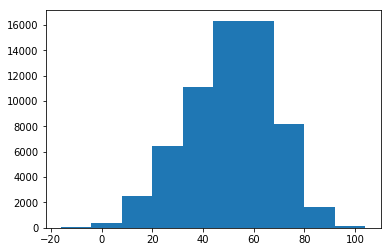

In [29]:
plt.hist(all_starts.GSc)

In [30]:
best_500_performances = all_starts.sort_values(by='GSc',ascending=False).head(500)

worst_500_performances = all_starts.sort_values(by='GSc',ascending=False).tail(500)

best_100_performances = all_starts.sort_values(by='GSc',ascending=False).head(100)

worst_100_performances = all_starts.sort_values(by='GSc',ascending=False).tail(100)

In [31]:
best_500_performances;

In [32]:
best_500_performances.loc[best_500_performances.GSc >= 100];

In [33]:
perfect_games = all_starts.loc[(all_starts['IP'] == 9)& (all_starts.H == 0)& (all_starts.BB == 0)& (all_starts.AB == 27)]

In [34]:
perfect_games.Month

19094    07
19738    05
22294    05
30698    06
31023    08
33621    04
46077    06
Name: Month, dtype: object

In [35]:
quality_starts = all_starts.loc[(all_starts['IP'] >= 6)& (all_starts.ER <= 3)]

(array([  11.,  333., 2747., 7618., 8210., 7306., 3490.,  977.,  228.,
          24.]),
 array([ 28. ,  35.6,  43.2,  50.8,  58.4,  66. ,  73.6,  81.2,  88.8,
         96.4, 104. ]),
 <a list of 10 Patch objects>)

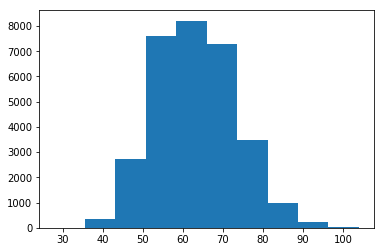

In [36]:
plt.hist(quality_starts.GSc)

(array([166., 132.,  85.,  54.,  14.,  25.,  17.,   4.,   2.,   1.]),
 array([ 86. ,  87.8,  89.6,  91.4,  93.2,  95. ,  96.8,  98.6, 100.4,
        102.2, 104. ]),
 <a list of 10 Patch objects>)

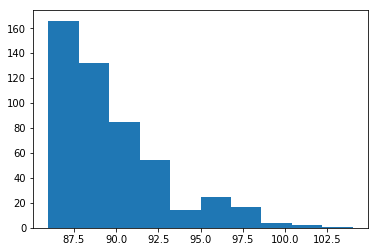

In [37]:
plt.hist(best_500_performances.GSc)

In [38]:
best_500_performances.sort_values(by='GSc',ascending=False);

In [39]:
 Counter(best_500_performances.IP)

Counter({9.0: 392, 8.0: 90, 8.2: 7, 7.2: 2, 7.0: 6, 8.1: 2, 7.1: 1})

In [40]:
best_500_performances.loc[best_500_performances.IP >= 8.2];

In [41]:
Counter(worst_500_performances.Player).most_common();

In [42]:
Counter(best_500_performances.Player).most_common();

In [43]:
best_500_performances['Overlap'] = best_500_performances.Player.isin(worst_500_performances.Player)

worst_500_performances['Overlap'] = worst_500_performances.Player.isin(best_500_performances.Player)

best_100_performances['Overlap'] = best_100_performances.Player.isin(worst_100_performances.Player)

worst_100_performances['Overlap'] = worst_100_performances.Player.isin(best_100_performances.Player)


best_500_performances;

In [44]:
Counter(best_500_performances.Overlap)

Counter({True: 318, False: 182})

In [45]:
np.sum(best_500_performances.Overlap)

318

In [46]:
overlap_best = best_500_performances.loc[best_500_performances.Overlap == True]

overlap_100_best = best_100_performances.loc[best_100_performances.Overlap == True]

overlap_worst = worst_500_performances.loc[worst_500_performances.Overlap == True]

overlap_100_worst = worst_100_performances.loc[worst_100_performances.Overlap == True]

In [47]:
overlap_best;

In [48]:
Counter(overlap_100_best.Player).most_common();

In [49]:
Counter(overlap_100_worst.Player).most_common();

In [50]:
Counter(quality_starts.Player).most_common();

In [51]:
Counter(all_starts.Player).most_common();

In [52]:
james_shields = all_starts.loc[all_starts.Player == 'James Shields']

In [53]:
all_starts.Player.nunique()

1044

In [54]:
all_starts.groupby('Player').GSc.std().sort_values(ascending=False);

In [55]:
player_count = all_starts.Player.value_counts()

hundred_appearances = player_count.loc[player_count >= 100]

In [56]:
hundred_appearances;

In [57]:
Counter(all_starts.Decision.isna())

Counter({False: 43950, True: 19064})

In [58]:
Counter(quality_starts.Decision.isna())

Counter({False: 22319, True: 8625})

In [59]:
8625 + 22321

30946

In [60]:
44033 + 19139

63172

## No decisions occur 28% of the time in quality starts, 30% in all starts

In [61]:
8625/30946

0.2787113035610418

In [62]:
19139/63172

0.30296650414740706

In [63]:
hundred_starts;

In [64]:
hundred_starts.groupby('Player').GSc.std().sort_values(ascending=False);

In [65]:
worst_500_performances.loc[worst_500_performances.Player == 'Colby Lewis']

,Unnamed: 0,Player,Date,Tm,Opp,IP,H,R,ER,BB,SO,HR,UER,Pit,Str,GSc,BF,AB,2B,3B,IBB,HBP,SH,SF,GDP,SB,CS,PO,BK,WP,ERA,WPA,aLI,Appearance,Decision,Result,Score,date_length,Month,Year,number_of_apps,standard_dev,Quality_start,Str_Ratio,H/IP,SO/IP,BB/IP,Overlap
27585,27656,Colby Lewis,2011-06-06,TEX,DET,3.1,10,9,9,1,3,4,0,88.0,55.0,6,22,21,2,0,0,0,0,0,0,0,0,0,0,1,24.30,-0.400,0.597,GS-4,L,L,7-13,10,06,2011,162,19.197683,0,0.625000,3.225806,0.967742,0.322581,True
47000,47107,Colby Lewis,2015-05-27,TEX,CLE,2.2,11,10,9,1,2,2,1,74.0,48.0,-1,20,19,3,0,0,0,0,0,0,1,0,0,0,0,30.38,-0.340,0.639,GS-3,L,L,3-12,10,05,2015,162,19.197683,0,0.648649,5.000000,0.909091,0.454545,True
47022,47129,Colby Lewis,2015-07-05,TEX,LAA,4.0,12,10,10,2,1,1,0,82.0,48.0,-3,26,21,3,0,0,1,0,2,1,0,0,0,0,0,22.50,-0.452,0.695,GS-5,L,L,6-12,10,07,2015,162,19.197683,0,0.585366,3.000000,0.250000,0.500000,True
5319,5341,Colby Lewis,2007-05-22,OAK,CHW,3.1,12,10,10,2,0,2,0,77.0,46.0,-6,23,21,2,0,0,0,0,0,1,0,0,0,0,1,27.00,-0.366,0.441,GS-4,L,L,4-10,10,05,2007,162,19.197683,0,0.597403,3.870968,0.000000,0.645161,True
42166,42261,Colby Lewis,2014-07-10,TEX,LAA,2.1,13,13,11,0,1,1,2,61.0,41.0,-16,20,18,3,1,0,0,0,2,1,0,0,0,0,0,42.43,-0.594,0.626,GS-3,L,L,6-15,10,07,2014,162,19.197683,0,0.672131,6.190476,0.476190,0.000000,True


In [66]:
best_500_performances.loc[best_500_performances.Player == 'Colby Lewis']

,Unnamed: 0,Player,Date,Tm,Opp,IP,H,R,ER,BB,SO,HR,UER,Pit,Str,GSc,BF,AB,2B,3B,IBB,HBP,SH,SF,GDP,SB,CS,PO,BK,WP,ERA,WPA,aLI,Appearance,Decision,Result,Score,date_length,Month,Year,number_of_apps,standard_dev,Quality_start,Str_Ratio,H/IP,SO/IP,BB/IP,Overlap
22622,22683,Colby Lewis,2010-04-30,TEX,SEA,9.0,3,0,0,1,10,0,0,116.0,79.0,90,31,30,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.660,1.147,GS-9,NaN,W,2-0,10,04,2010,162,19.197683,1,0.681034,0.333333,1.111111,0.111111,True
22627,22688,Colby Lewis,2010-06-19,TEX,HOU,9.0,2,1,1,0,9,0,0,101.0,72.0,88,28,28,1,0,0,0,0,0,1,0,0,0,0,1,1.0,0.373,0.917,CG,W,W,5-1,10,06,2010,162,19.197683,1,0.712871,0.222222,1.000000,0.000000,True
46932,47039,Colby Lewis,2015-09-11,TEX,OAK,9.0,2,0,0,0,4,0,0,97.0,65.0,87,29,29,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.365,0.586,SHO,W,W,4-0,10,09,2015,162,19.197683,1,0.670103,0.222222,0.444444,0.000000,True


In [67]:
lone_start = all_starts.loc[all_starts.number_of_apps == 1]

In [68]:
lone_start.sort_values(by='GSc',ascending=False)

,Unnamed: 0,Player,Date,Tm,Opp,IP,H,R,ER,BB,SO,HR,UER,Pit,Str,GSc,BF,AB,2B,3B,IBB,HBP,SH,SF,GDP,SB,CS,PO,BK,WP,ERA,WPA,aLI,Appearance,Decision,Result,Score,date_length,Month,Year,number_of_apps,standard_dev,Quality_start,Str_Ratio,H/IP,SO/IP,BB/IP
7520,7545,Kurt Birkins,2007-09-03,BAL,TBD,4.0,6,4,4,2,3,0,0,72.0,41.0,35,19,17,1,0,0,0,0,0,0,1,0,0,0,0,9.0,-0.174,1.417,GS-4,NaN,L,7-9,10,09,2007,1,NaN,0,0.569444,1.5,0.75,0.5


In [69]:
jose_contreras = all_starts.loc[all_starts.Player == 'Jose Contreras']

In [70]:
colby_lewis = all_starts.loc[all_starts.Player == 'Colby Lewis']

colby_lewis.groupby('Year').head(300);

In [71]:
historic_pitching = pd.read_csv('historic_pitching.csv')

In [72]:
historic_pitching = historic_pitching.drop(columns=['deathYear','deathMonth','deathDay','deathCountry','deathState','deathCity','birthCountry'])

In [73]:
post_2006_table = historic_pitching.where(historic_pitching.yearID >= 2006)

In [74]:
Old_hoss = historic_pitching.loc[historic_pitching.nameFirst == 'Old Hoss']

In [75]:
Colby_lewis_seasons = historic_pitching.loc[(historic_pitching.nameFirst == 'Colby') & (historic_pitching.nameLast == 'Lewis') ]

In [76]:
Colby_lewis_seasons.G.sum()

233

In [77]:
all_starts.sort_values(by='GSc',ascending=True);

In [78]:
post_2006_table = post_2006_table.dropna(how='all')

post_2006_table.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,birthYear,birthMonth,birthDay,birthState,birthCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,full_name
26756,clemero02,2006.0,1.0,HOU,NL,7.0,6.0,19.0,19.0,0.0,0.0,0.0,340.0,89.0,29.0,7.0,29.0,102.0,0.216,2.30,1.0,3.0,4.0,0.0,451.0,0.0,34.0,5.0,1.0,11.0,1962.0,8.0,4.0,OH,Dayton,Roger,Clemens,William Roger,205.0,76.0,R,R,1984-05-15,2007-09-16,clemr001,clemero02,William Roger Clemens
26757,clemero02,2007.0,1.0,NYA,AL,6.0,6.0,18.0,17.0,0.0,0.0,0.0,297.0,99.0,46.0,9.0,31.0,68.0,0.261,4.18,0.0,7.0,5.0,0.0,420.0,0.0,52.0,2.0,3.0,9.0,1962.0,8.0,4.0,OH,Dayton,Roger,Clemens,William Roger,205.0,76.0,R,R,1984-05-15,2007-09-16,clemr001,clemero02,William Roger Clemens
27899,maddugr01,2006.0,1.0,CHN,NL,9.0,11.0,22.0,22.0,0.0,0.0,0.0,409.0,153.0,71.0,14.0,23.0,81.0,0.284,4.69,3.0,0.0,0.0,0.0,572.0,0.0,78.0,7.0,3.0,10.0,1966.0,4.0,14.0,TX,San Angelo,Greg,Maddux,Gregory Alan,170.0,72.0,R,R,1986-09-03,2008-09-27,maddg002,maddugr01,Gregory Alan Maddux
27900,maddugr01,2006.0,2.0,LAN,NL,6.0,3.0,12.0,12.0,0.0,0.0,0.0,221.0,66.0,27.0,6.0,14.0,36.0,0.244,3.30,4.0,0.0,0.0,0.0,290.0,0.0,31.0,4.0,2.0,7.0,1966.0,4.0,14.0,TX,San Angelo,Greg,Maddux,Gregory Alan,170.0,72.0,R,R,1986-09-03,2008-09-27,maddg002,maddugr01,Gregory Alan Maddux
27901,maddugr01,2007.0,1.0,SDN,NL,14.0,11.0,34.0,34.0,1.0,0.0,0.0,594.0,221.0,91.0,14.0,25.0,104.0,0.285,4.14,3.0,5.0,6.0,0.0,830.0,0.0,92.0,15.0,8.0,14.0,1966.0,4.0,14.0,TX,San Angelo,Greg,Maddux,Gregory Alan,170.0,72.0,R,R,1986-09-03,2008-09-27,maddg002,maddugr01,Gregory Alan Maddux


In [79]:
post_2006_table.loc[post_2006_table['playerID'] == 'maddugr01']

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,birthYear,birthMonth,birthDay,birthState,birthCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,full_name
27899,maddugr01,2006.0,1.0,CHN,NL,9.0,11.0,22.0,22.0,0.0,0.0,0.0,409.0,153.0,71.0,14.0,23.0,81.0,0.284,4.69,3.0,0.0,0.0,0.0,572.0,0.0,78.0,7.0,3.0,10.0,1966.0,4.0,14.0,TX,San Angelo,Greg,Maddux,Gregory Alan,170.0,72.0,R,R,1986-09-03,2008-09-27,maddg002,maddugr01,Gregory Alan Maddux
27900,maddugr01,2006.0,2.0,LAN,NL,6.0,3.0,12.0,12.0,0.0,0.0,0.0,221.0,66.0,27.0,6.0,14.0,36.0,0.244,3.30,4.0,0.0,0.0,0.0,290.0,0.0,31.0,4.0,2.0,7.0,1966.0,4.0,14.0,TX,San Angelo,Greg,Maddux,Gregory Alan,170.0,72.0,R,R,1986-09-03,2008-09-27,maddg002,maddugr01,Gregory Alan Maddux
27901,maddugr01,2007.0,1.0,SDN,NL,14.0,11.0,34.0,34.0,1.0,0.0,0.0,594.0,221.0,91.0,14.0,25.0,104.0,0.285,4.14,3.0,5.0,6.0,0.0,830.0,0.0,92.0,15.0,8.0,14.0,1966.0,4.0,14.0,TX,San Angelo,Greg,Maddux,Gregory Alan,170.0,72.0,R,R,1986-09-03,2008-09-27,maddg002,maddugr01,Gregory Alan Maddux
27902,maddugr01,2008.0,1.0,SDN,NL,6.0,9.0,26.0,26.0,0.0,0.0,0.0,460.0,161.0,68.0,16.0,26.0,80.0,0.271,3.99,4.0,2.0,5.0,2.0,638.0,0.0,80.0,6.0,6.0,13.0,1966.0,4.0,14.0,TX,San Angelo,Greg,Maddux,Gregory Alan,170.0,72.0,R,R,1986-09-03,2008-09-27,maddg002,maddugr01,Gregory Alan Maddux
27903,maddugr01,2008.0,2.0,LAN,NL,2.0,4.0,7.0,7.0,0.0,0.0,0.0,122.0,43.0,23.0,5.0,4.0,18.0,0.276,5.09,1.0,0.0,1.0,0.0,166.0,0.0,25.0,3.0,2.0,3.0,1966.0,4.0,14.0,TX,San Angelo,Greg,Maddux,Gregory Alan,170.0,72.0,R,R,1986-09-03,2008-09-27,maddg002,maddugr01,Gregory Alan Maddux


In [80]:
#all_starts.to_csv('all_starts.csv',index=False)

SystemError: <built-in method item of numpy.ndarray object at 0x121eb4bc0> returned a result with an error set

In [ ]:
#post_2006_table.to_csv('post_2006_table.csv',index=False)

In [ ]:
plt.hist(historic_pitching.yearID)

In [ ]:
all_seasons = pd.read_csv('all_seasons.csv')

In [ ]:
all_seasons;

In [ ]:
all_seasons['K/9'] = (all_seasons.SO / all_seasons.IP) * 9

all_seasons['BB/9'] = (((all_seasons.BB + all_seasons.IBB) /(all_seasons.IP)) * 9)

In [ ]:
all_seasons.sort_values(by='BB/9',ascending=True).head(200)

In [ ]:
#pitch_data = pitching_stats(2006,2018)

In [ ]:
pitch_data['K%']

In [ ]:
cluster_data = pitch_data[['Season','Name','Age','WAR','IP','K/9','BB/9','tERA','HR/9','LOB%','FIP','GB/FB','BABIP','Pace (pi)','Zone% (pi)','Contact% (pi)','K%','BB%','SwStr%']]


In [ ]:
cluster_data.to_csv('cluster_data.csv',index=False)